dataset: https://www.kaggle.com/dalpozz/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

FILE_NAME = 'creditcard.csv'

In [2]:
#load data
full_data = pd.read_csv(FILE_NAME)

#rename the 'Class' column
full_data.rename(columns = {'Class': 'Label'}, inplace = True)

#let's take a peek
print full_data.shape
full_data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.utils import shuffle
full_data = shuffle(full_data)

# Seperate target labels
labels = full_data['Label']

times = full_data['Time']
features = full_data.drop(['Time', 'Label'], axis=1)

# Get some specifics on our dataset
print "Data consists of {} instances of data with {} total features with value counts of \n{}".format(
    features.shape[0], features.shape[1], labels.value_counts())
print "Where 0 indicates a legitimate transaction and 1 indicates fraud"

Data consists of 284807 instances of data with 29 total features with value counts of 
0    284315
1       492
Name: Label, dtype: int64
Where 0 indicates a legitimate transaction and 1 indicates fraud


In [4]:
from sklearn.preprocessing import StandardScaler

# Scale the amount spent
features['normAmount'] = StandardScaler().fit_transform(features['Amount'].reshape(-1, 1))

In [5]:
amounts = features['Amount']
features = features.drop(['Amount'], axis=1)
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
235327,1.703300,-0.863266,0.104905,1.247179,-0.141436,2.679679,-1.520703,1.006440,1.831379,-0.026611,...,-0.381504,0.059823,0.558681,0.301081,-0.708090,-0.460214,-0.605743,0.138376,-0.039287,-0.265072
266360,1.964137,0.058253,-1.797970,0.581708,0.126463,-1.452885,0.293474,-0.357730,0.646047,-0.529761,...,-0.149845,0.216898,0.691547,-0.048083,-0.095469,0.207807,-0.101422,-0.008903,-0.022834,-0.167318
35223,1.369382,-0.436701,-0.346418,-0.821032,-0.338874,-0.399493,-0.210304,-0.068217,-1.341384,0.871767,...,-0.533924,-0.359787,-0.575358,-0.019121,-0.274605,0.358820,1.106498,-0.079808,-0.022458,-0.321245
152565,1.974238,-0.404622,0.217208,0.539687,-0.934828,-0.375689,-0.945837,-0.071938,2.622833,-0.401860,...,-0.178805,-0.118053,0.070297,0.303308,-0.133564,-0.591890,0.447994,-0.037839,-0.043660,-0.289460
280472,1.713941,-1.532205,-1.721972,-0.184136,-0.715999,-0.587145,-0.178479,-0.177906,0.032715,0.731916,...,-0.283905,0.059015,0.165055,-0.128037,0.559865,0.072100,-0.059637,-0.049411,-0.011774,0.626302


In [21]:
#?????????????????
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer, confusion_matrix

f1_scorer = make_scorer(f1_score, pos_label = 0)

# We're going to hold out a test set from oversampling to see how our model trained on the oversampled data does on the original data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = .25)

print train_labels.value_counts()
print test_labels.value_counts()

0    213230
1       375
Name: Label, dtype: int64
0    71085
1      117
Name: Label, dtype: int64


In [7]:
from imblearn.over_sampling import SMOTE

# implement synthetic minority oversampling technique for a more balanced dataset to feed our model
oversampler = SMOTE(random_state=331)
os_features, os_labels = oversampler.fit_sample(train_features, train_labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(os_features, os_labels, test_size = .25)

# Let's get an idea of what our new oversampled data looks like

print 'training instances of data:' , len(y_train) 
print 'training instances of fraud' , np.count_nonzero(y_train)
print 'testing instances of data:' , len(y_test) 
print 'testing instances of fraud:' , np.count_nonzero(y_test)

training instances of data: 319845
training instances of fraud 159912
testing instances of data: 106615
testing instances of fraud: 53318


In [9]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

print "For Random Forest Classifier:"
rfscores = cross_val_score(rf, os_features, os_labels, scoring = f1_scorer)
print rfscores, rfscores.mean()

print "For K-Nearest Neighbors Classifier:"
knnscores = cross_val_score(knn, os_features, os_labels, scoring = f1_scorer)
print knnscores, knnscores.mean()

For Random Forest Classifier:
[ 0.99981707  0.99982411  0.99983818] 0.999826453198
For K-Nearest Neighbors Classifier:
[ 0.99896484  0.99868985  0.99888023] 0.998844970617


In [10]:
#majority vote benchmark without oversampling
majority_vote_predictions = np.zeros(features.shape[0])
print "f1 score for simple majority vote is " , f1_score(labels, majority_vote_predictions, pos_label = 0)

f1 score for simple majority vote is  0.999135510488


In [11]:
rf_params = {'n_estimators' : np.arange(10, 110, 15),
                'min_samples_split': np.arange(2, 8, 2),
                'max_features': np.arange(1, 29, 4),
                'criterion': ['gini', 'entropy']}


rf_tune = RandomizedSearchCV(rf, rf_params, n_iter = 25, scoring = f1_scorer, verbose = 3)

rf_tune = rf_tune.fit(os_features, os_labels)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] n_estimators=25, min_samples_split=2, criterion=entropy, max_features=1 
[CV]  n_estimators=25, min_samples_split=2, criterion=entropy, max_features=1, score=0.999866 -   0.6s
[CV] n_estimators=25, min_samples_split=2, criterion=entropy, max_features=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.6s remaining:    0.0s


[CV]  n_estimators=25, min_samples_split=2, criterion=entropy, max_features=1, score=0.999831 -   0.6s
[CV] n_estimators=25, min_samples_split=2, criterion=entropy, max_features=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.3s remaining:    0.0s


[CV]  n_estimators=25, min_samples_split=2, criterion=entropy, max_features=1, score=0.999845 -   0.5s
[CV] n_estimators=10, min_samples_split=2, criterion=entropy, max_features=21 
[CV]  n_estimators=10, min_samples_split=2, criterion=entropy, max_features=21, score=0.999676 -   0.1s
[CV] n_estimators=10, min_samples_split=2, criterion=entropy, max_features=21 
[CV]  n_estimators=10, min_samples_split=2, criterion=entropy, max_features=21, score=0.999627 -   0.1s
[CV] n_estimators=10, min_samples_split=2, criterion=entropy, max_features=21 
[CV]  n_estimators=10, min_samples_split=2, criterion=entropy, max_features=21, score=0.999789 -   0.1s
[CV] n_estimators=85, min_samples_split=6, criterion=gini, max_features=9 
[CV]  n_estimators=85, min_samples_split=6, criterion=gini, max_features=9, score=0.999824 -   1.8s
[CV] n_estimators=85, min_samples_split=6, criterion=gini, max_features=9 
[CV]  n_estimators=85, min_samples_split=6, criterion=gini, max_features=9, score=0.999838 -   1.9

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 439.6min finished


In [12]:
print rf_tune.best_estimator_ , '\nf1 score:' , rf_tune.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 
f1 score: 0.999856941492


In [13]:
rft = rf_tune.best_estimator_
rft.fit_transform(X_train, y_train)

rfu = RandomForestClassifier()
rfu.fit_transform(X_train, y_train)

C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-1.14748263, -0.41471575, -0.27715551, -0.62149895,  0.361638  ,
         0.04151148],
       [-0.78123839, -0.96877863, -0.57963475, -1.3623686 ,  0.11400963,
        -0.3206355 ],
       [-6.27852821,  3.01893411, -6.60179368, -7.68470916, -2.57070958,
         0.918958  ],
       ..., 
       [ 0.1026754 ,  1.05104284,  1.64328036, -0.30613186,  0.36443625,
         0.14194996],
       [ 0.03093379,  0.49913424, -0.08120353,  0.76550463,  0.39444543,
         2.08177092],
       [-0.31799603, -0.60027605,  0.63097503, -0.58918361, -0.18149779,
        -0.32864283]])

In [14]:
# Check performances of tuned and untuned models 
# Add check on original data before oversampling
print "f1 testing score for tuned random forest on oversampled data is ", f1_score(y_test, rft.predict(X_test), pos_label = 0)
print "f1 testing score for random forest on oversampled data is " , f1_score(y_test, rfu.predict(X_test), pos_label = 0)

print "f1 testing score for tuned random forest on original test data is ", f1_score(test_labels, rft.predict(test_features), pos_label = 0)

f1 testing score for tuned random forest on oversampled data is  0.999849875209
f1 testing score for random forest on oversampled data is  0.999812344011
f1 testing score for tuned random forest on original test data is  0.999746789146


In [15]:
confusion_matrix(y_test, rft.predict(X_test))

array([[53281,    16],
       [    0, 53318]])

In [ ]:
#now let's try a neural network

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [26]:
# Let's build a model

# needs more tuning
model = Sequential()
model.add(Dense(40, input_dim = X_train.shape[1], activation = 'tanh', init = 'lecun_uniform', W_regularizer = l2(.01)))
#model.add(Dropout(0.2))
model.add(Dense(12, activation = 'tanh', init = 'lecun_uniform', W_regularizer = l2(.001)))
model.add(Dense(4, activation = 'tanh', init = 'lecun_uniform'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

sgd = SGD(lr = .16, momentum = .87, decay = .002)

model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['fmeasure'])

In [27]:
history = model.fit(X_train, y_train, nb_epoch = 331, batch_size = 1000, verbose = 2, 
                    validation_split = .20, shuffle = True)

Train on 255876 samples, validate on 63969 samples
Epoch 1/331
1s - loss: 0.1859 - fmeasure: 0.9514 - val_loss: 0.0735 - val_fmeasure: 0.9679
Epoch 2/331
1s - loss: 0.0997 - fmeasure: 0.9735 - val_loss: 0.0608 - val_fmeasure: 0.9774
Epoch 3/331
1s - loss: 0.0861 - fmeasure: 0.9799 - val_loss: 0.0461 - val_fmeasure: 0.9847
Epoch 4/331
1s - loss: 0.0852 - fmeasure: 0.9828 - val_loss: 0.0450 - val_fmeasure: 0.9833
Epoch 5/331
1s - loss: 0.0744 - fmeasure: 0.9850 - val_loss: 0.0427 - val_fmeasure: 0.9860
Epoch 6/331
1s - loss: 0.0734 - fmeasure: 0.9849 - val_loss: 0.0347 - val_fmeasure: 0.9879
Epoch 7/331
1s - loss: 0.0672 - fmeasure: 0.9878 - val_loss: 0.0322 - val_fmeasure: 0.9888
Epoch 8/331
1s - loss: 0.0668 - fmeasure: 0.9874 - val_loss: 0.0468 - val_fmeasure: 0.9787
Epoch 9/331
1s - loss: 0.0653 - fmeasure: 0.9880 - val_loss: 0.0325 - val_fmeasure: 0.9904
Epoch 10/331
1s - loss: 0.0636 - fmeasure: 0.9886 - val_loss: 0.0338 - val_fmeasure: 0.9865
Epoch 11/331
1s - loss: 0.0637 - fmeas

In [28]:
predictions = model.predict(X_test)
predictions[:] = predictions[:]>0.5

print "Our neural network achieves an f1 score of " , f1_score(y_test, predictions, pos_label = 0) , "on the oversampled testing data"
print confusion_matrix(y_test, predictions)

opredictions = model.predict(test_features.values)
opredictions[:] = opredictions[:]>0.5
print "Our neural network achieves an f1 score of" , f1_score(test_labels.values, opredictions, pos_label = 0) , "on the original testing data"
confusion_matrix(test_labels.values, opredictions)

Our neural network achieves an f1 score of  0.995486176415 on the oversampled testing data
[[52930   367]
 [  113 53205]]
Our neural network achieves an f1 score of 0.996952724913 on the original data


array([[70667,   418],
       [   14,   103]])

<function matplotlib.pyplot.show>

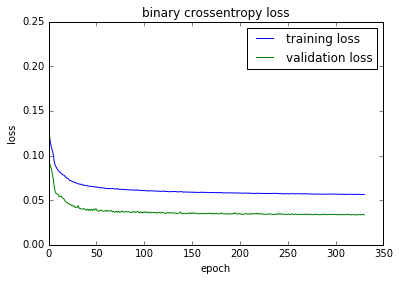

In [25]:
# Plot training loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('binary crossentropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.show